In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/clementyuen/Documents/Python/UNZIP_FOR_NOTEBOOKS_FINAL/11-Logistic-Regression-Models'

In [4]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<AxesSubplot:xlabel='physical_score'>

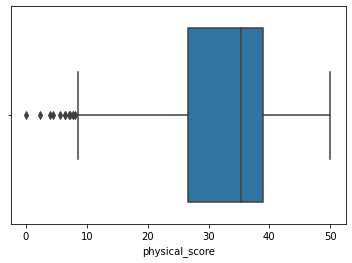

In [9]:
sns.boxplot(data=df,x='physical_score')

In [10]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

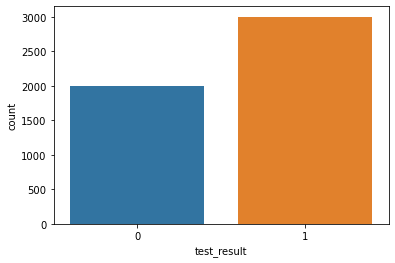

In [11]:
sns.countplot(data=df,x='test_result')

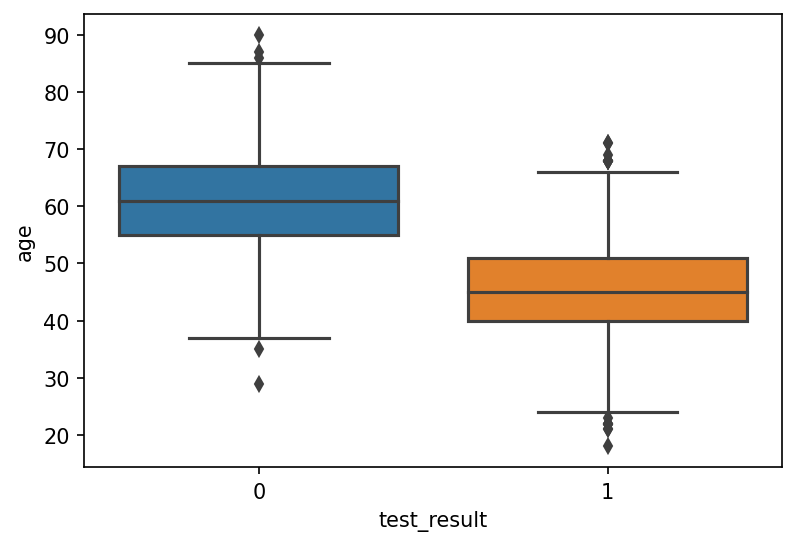

In [25]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result', y='age')
plt.savefig('test.jpg',bbox_inches='tight');

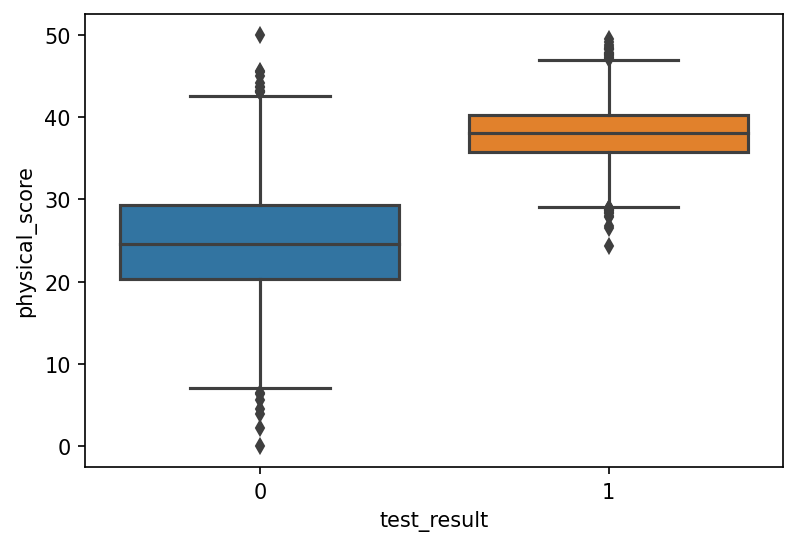

In [26]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result', y='physical_score')
plt.savefig('test.jpg',bbox_inches='tight');

<AxesSubplot:xlabel='age', ylabel='physical_score'>

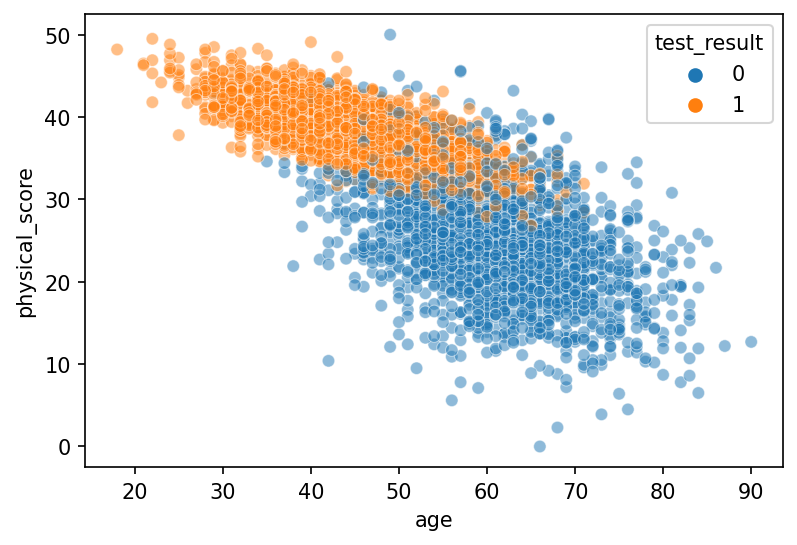

In [30]:
plt.figure(dpi=150)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result', alpha=0.5)

<Figure size 300000x300000 with 0 Axes>

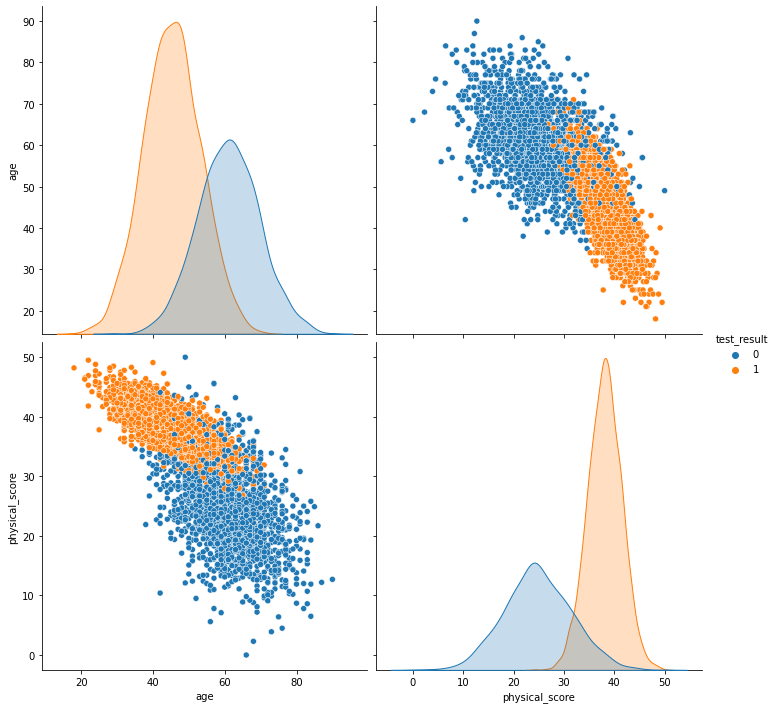

In [46]:
plt.figure(dpi=10000,figsize=(30,30))

sns.pairplot(df,hue='test_result',aspect=1,height=5);

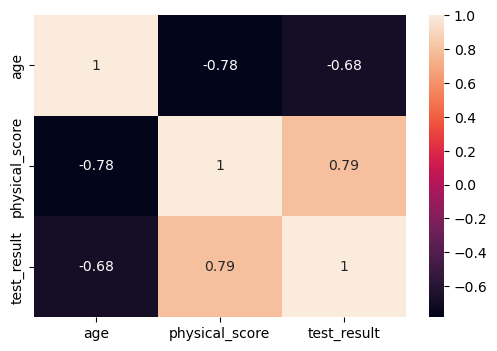

In [51]:
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot = True);

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

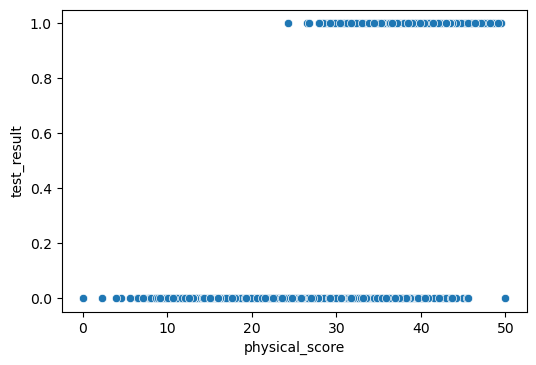

In [53]:
plt.figure(dpi=100)
sns.scatterplot(x='physical_score',y='test_result',data=df)

Text(0.5, 0, 'test_result')

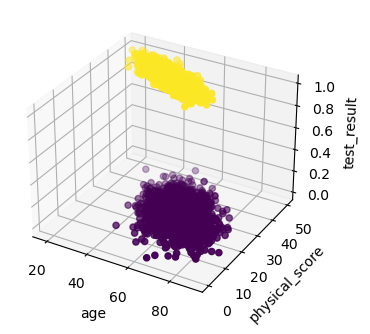

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
plt.xlabel('age')
plt.ylabel('physical_score')
ax.set_zlabel('test_result')

In [72]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [74]:
X = df.drop('test_result',axis=1)

In [75]:
y = df.test_result

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [79]:
scaler = StandardScaler()

In [80]:
scaled_X_train = scaler.fit_transform(X_train)

In [81]:
scaled_X_test = scaler.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_model = LogisticRegression()

In [84]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [85]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [87]:
y_pred = log_model.predict(scaled_X_test)

In [107]:
y_pred_prob = log_model.predict_proba(scaled_X_test)
y_pred_prob[:5]

array([[0.02384343, 0.97615657],
       [0.02692408, 0.97307592],
       [0.98919417, 0.01080583],
       [0.00190769, 0.99809231],
       [0.97501262, 0.02498738]])

In [91]:
log_model

LogisticRegression()

In [92]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [98]:
 df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [100]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [101]:
y_pred = log_model.predict(scaled_X_test)

In [102]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [103]:
accuracy_score(y_test, y_pred)

0.93

In [104]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [105]:
from sklearn.metrics import plot_confusion_matrix

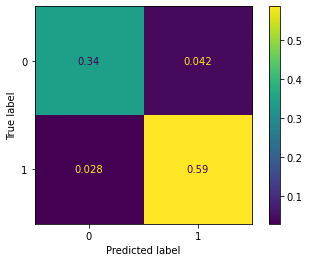

In [111]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize ='all')

In [112]:
len(y_test)

500

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [114]:
from sklearn.metrics import precision_score, recall_score

In [115]:
precision_score(y_test,y_pred)

0.9331210191082803

In [116]:
recall_score(y_test,y_pred)

0.9543973941368078

In [117]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve 

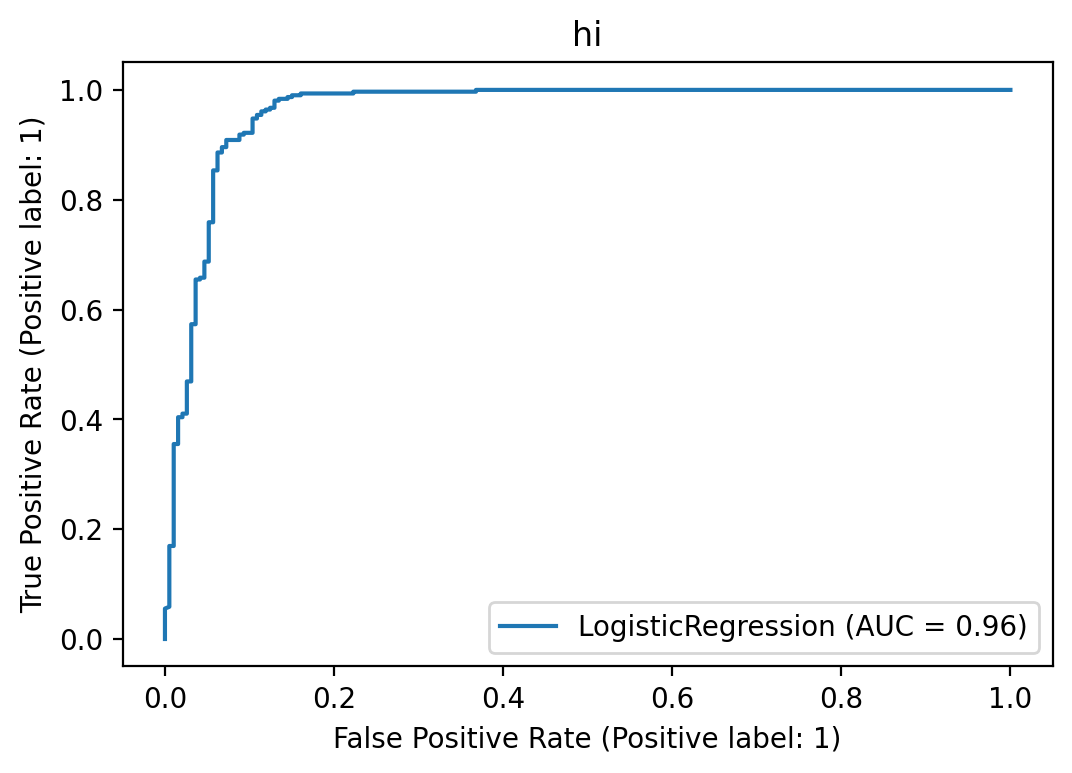

In [130]:
fig,ax = plt.subplots(dpi=200)
ax.set_title('hi')

plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

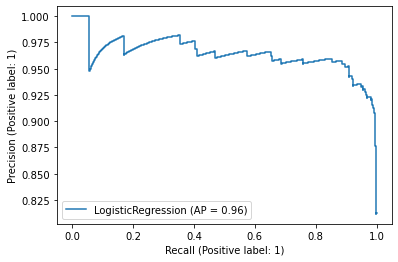

In [131]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [132]:
log_model.predict_proba(scaled_X_test)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [133]:
y_test[0]

1

In [165]:
df2 = pd.DataFrame(log_model.predict_proba(scaled_X_test))
df2

,0,1
0,0.023843,0.976157
1,0.026924,0.973076
2,0.989194,0.010806
3,0.001908,0.998092
4,0.975013,0.024987
...,...,...
495,0.044007,0.955993
496,0.186805,0.813195
497,0.980608,0.019392
498,0.994715,0.005285


In [171]:
df2.join(df_y_test).rename(columns={'test_result':'actual_result'})

,0,1,actual_result
0,0.023843,0.976157,1
1,0.026924,0.973076,1
2,0.989194,0.010806,0
3,0.001908,0.998092,1
4,0.975013,0.024987,0
...,...,...,...
495,0.044007,0.955993,1
496,0.186805,0.813195,1
497,0.980608,0.019392,0
498,0.994715,0.005285,0


In [161]:
df2 = df2.drop('test_result',axis=1)

In [143]:
df_y_test = pd.DataFrame(y_test)

In [168]:
df_y_test = df_y_test.reset_index().drop('index',axis=1)

In [169]:
df_y_test

,test_result
0,1
1,1
2,0
3,1
4,0
...,...
495,1
496,1
497,0
498,0


In [172]:
df3 = pd.read_csv('../DATA/iris.csv')

In [173]:
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [174]:
df3.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [176]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [177]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='count'>

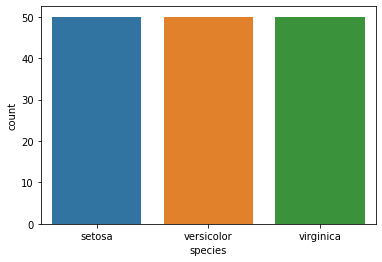

In [187]:
sns.countplot(x= df3.species, data=df3)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

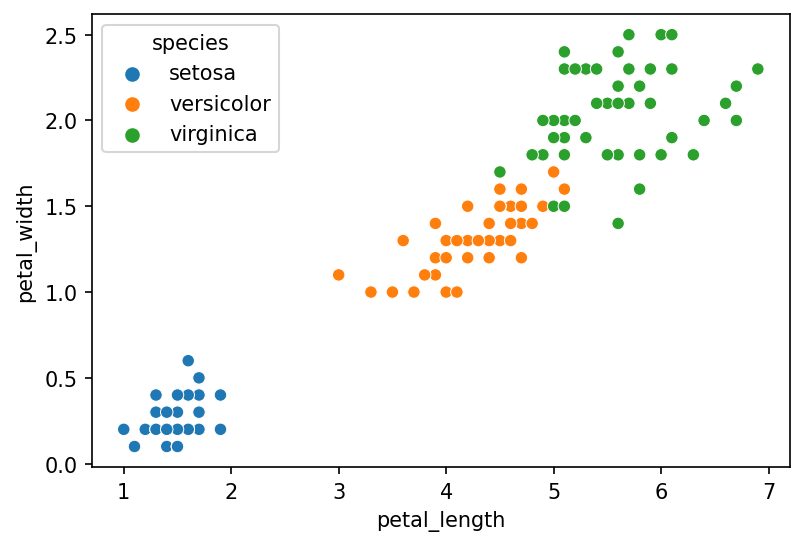

In [192]:
plt.figure(dpi=150)
sns.scatterplot(x='petal_length',y='petal_width',data=df3, hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

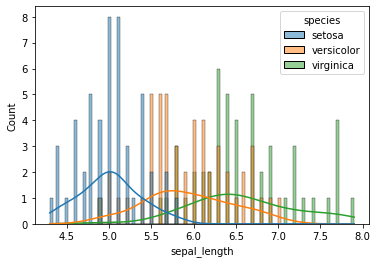

In [215]:
sns.histplot(data=df3,x='sepal_length', kde=True, bins=100,hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

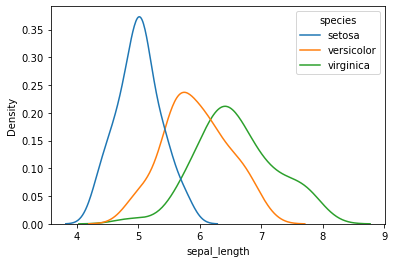

In [203]:
sns.kdeplot(data=df3,x='sepal_length',hue='species')

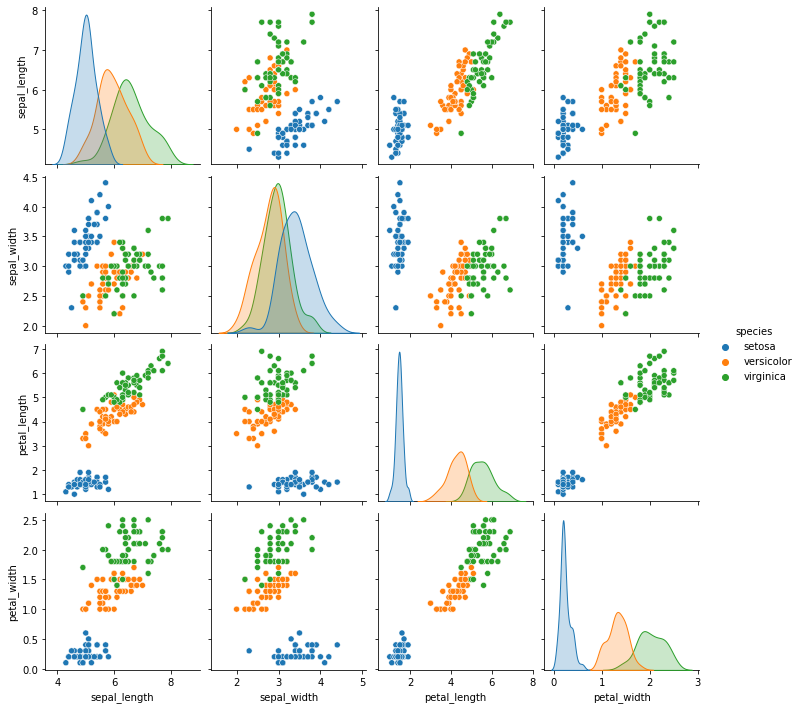

In [193]:
sns.pairplot(df3,hue='species')

<AxesSubplot:>

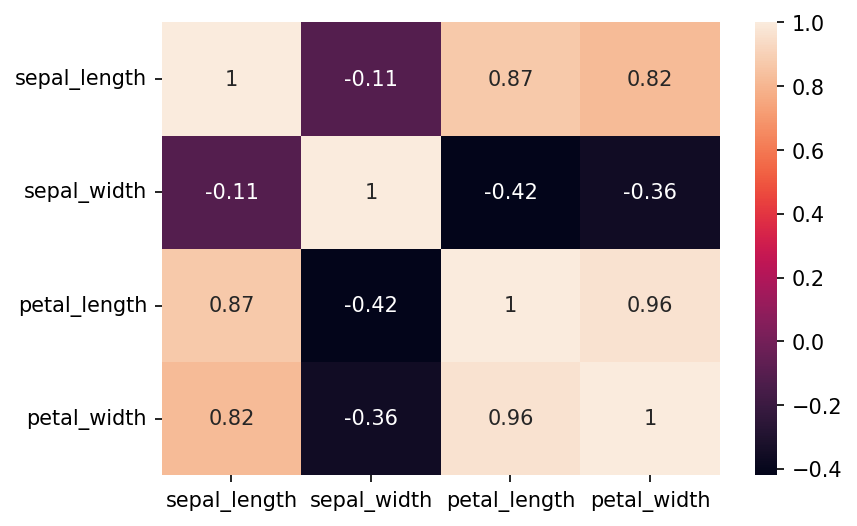

In [195]:
plt.figure(dpi=150)
sns.heatmap(df3.corr(),annot=True)

In [196]:
X = df3.drop('species',axis=1)

In [197]:
y = df3.species

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [218]:
scaler = StandardScaler()

In [219]:
scaled_X_train = scaler.fit_transform(X_train)

In [220]:
scaled_X_test = scaler.transform(X_test)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
from sklearn.model_selection import GridSearchCV

In [224]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [232]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)


param_grid = {'penalty':penalty,
             'l1_ratio': l1_ratio,
             'C':C}

In [265]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, verbose=1)

In [268]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
import time

start = time.time()

grid_model.fit(scaled_X_train, y_train)

end = time.time()
print(end-start,'seconds')

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio p

115.45209908485413 seconds


/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/Users/clementyuen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [239]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [240]:
y_pred = grid_model.predict(scaled_X_test)

In [241]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [242]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [243]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

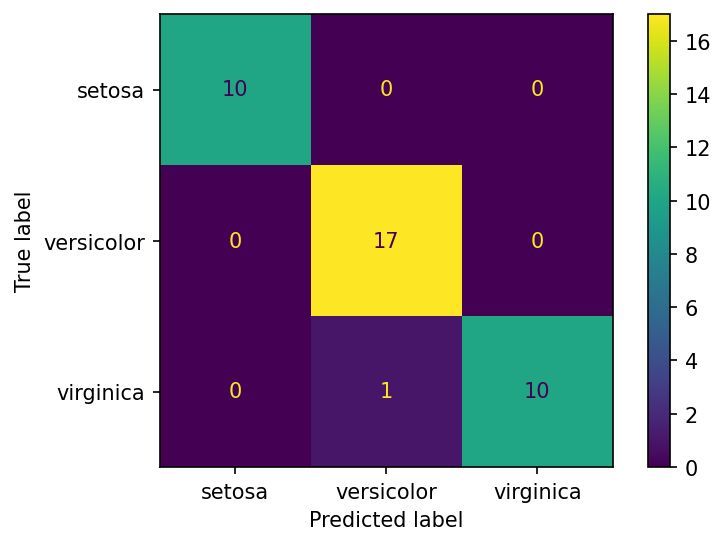

In [255]:
fig,ax = plt.subplots(dpi=150)
plot_confusion_matrix(grid_model, scaled_X_test, y_test, ax = ax)

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [258]:
from sklearn.metrics import roc_curve, auc

In [259]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

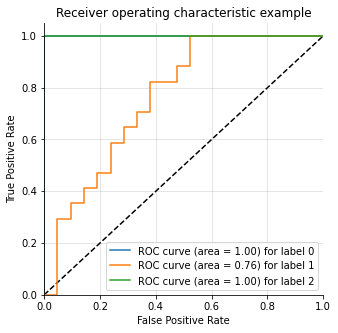

In [261]:
plot_multiclass_roc(grid_model,scaled_X_test, y_test, n_classes = 3)